In [1]:
import importlib

importlib.reload(construct)

NameError: name 'construct' is not defined

In [1]:
import sys
import os
sys.path.append(os.getcwd()+"/../")
os.chdir(os.getcwd()+"/../")

In [3]:
os.getcwd()

'/home/kevintakano/master'

# construct

In [4]:
import lib.data.preprocess as preprocess
from lib.data import construct
train_df, valid_df, test_df = construct.load_constructed()
train_df.head()

/home/kevintakano/miniconda3/envs/master/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


session_id                         timestamp    item_id category  label  \
0          33  2014-04-06 18:13:10.756000+00:00  214834865        0   True   
1          33  2014-04-06 18:13:47.162000+00:00  214571188        0   True   
2          33  2014-04-06 18:13:49.398000+00:00  214571188        0   True   
3          33  2014-04-06 18:13:49.925000+00:00  214571188        0   True   
4          33  2014-04-06 18:15:25.464000+00:00  214820225        0   True   

   item_id_prob  dwelltime  weekday  day  hour  month  week  item_rank  \
0          0.20          0        6    6    18      4    14       78.0   
1          0.08         36        6    6    18      4    14       19.0   
2          0.08          2        6    6    18      4    14       19.0   
3          0.08          0        6    6    18      4    14       19.0   
4          0.04         95        6    6    18      4    14        5.0   

   price_dist_avg  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0

In [5]:
_, db, _ = construct.read_recsys_data(use_samples=True)
db   

/home/kevintakano/miniconda3/envs/master/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


session_id                 timestamp    item_id  price  quantity
0            420374  2014-04-06T18:44:58.314Z  214537888  12462         1
1            420374  2014-04-06T18:44:58.325Z  214537850  10471         1
2            281626  2014-04-06T09:40:13.032Z  214535653   1883         1
3            420368  2014-04-04T06:13:28.848Z  214530572   6073         1
4            420368  2014-04-04T06:13:28.858Z  214835025   2617         1
...             ...                       ...        ...    ...       ...
1150748    11368701  2014-09-26T07:52:51.357Z  214849809    554         2
1150749    11368691  2014-09-25T09:37:44.206Z  214700002   6806         5
1150750    11523941  2014-09-25T06:14:47.965Z  214578011  14556         1
1150751    11423202  2014-09-26T18:49:34.024Z  214849164   1046         1
1150752    11423202  2014-09-26T18:49:34.026Z  214560500   5549         1

[1150753 rows x 5 columns]

In [15]:
train_df[['item_id','item_rank']].drop_duplicates().fillna(0.0).sort_values('item_rank').tail(20)

item_id  item_rank
56361   214826610      535.0
563029  214854300      544.0
408     214717003      569.0
498850  214850945      574.0
466433  214853105      581.0
590223  214853100      584.0
2504    214821302      623.0
67688   214834877      628.0
531180  214853767      645.0
67682   214834880      646.0
499173  214853422      650.0
465902  214853094      766.0
28      214821290      786.0
590598  214854785      887.0
499605  214850949      900.0
119     214821305     1029.0
500965  214850947     1276.0
590390  214853102     1548.0
24      214821277     1667.0
499763  214853420     2124.0

In [20]:
import lib.data.features as feat

d = feat.build_item_rank(db, train_df)
d

{214537888: 4,
 214537850: 3,
 214716984: 278,
 214716932: 187,
 214820255: 33,
 214834865: 78,
 214706441: 16,
 214820225: 5,
 214821285: 238,
 214821277: 1667,
 214826608: 176,
 214695097: 8,
 214695092: 3,
 214717005: 111,
 214748293: 62,
 214717888: 72,
 214821024: 10,
 214829282: 71,
 214819547: 61,
 214746382: 3,
 214573357: 8,
 214716973: 177,
 214714880: 129,
 214821307: 284,
 214748295: 113,
 214684093: 226,
 214648245: 1,
 214819762: 50,
 214826801: 172,
 214571904: 45,
 214716673: 8,
 214820413: 82,
 214821292: 303,
 214555903: 2,
 214708305: 7,
 214826953: 17,
 214819760: 38,
 214602806: 4,
 214600502: 17,
 214832653: 62,
 214612706: 21,
 214826955: 184,
 214826627: 175,
 214826803: 127,
 214687685: 28,
 214820233: 168,
 214820261: 263,
 214839765: 2,
 214533020: 24,
 214829285: 122,
 214523690: 61,
 214639215: 25,
 214523700: 321,
 214717003: 569,
 214839313: 365,
 214748291: 35,
 214534852: 3,
 214685782: 6,
 214821290: 786,
 214753505: 44,
 214594680: 31,
 214826810: 153

In [27]:
import pandas as pd
train_df['price_dist_avg_bin'] = pd.qcut(train_df['price_dist_avg'],10,duplicates='drop',labels=False)
train_df.price_dist_avg_bin

0          2
1          2
2          2
3          2
4          2
          ..
3327999    2
3328000    2
3328001    2
3328002    2
3328003    2
Name: price_dist_avg_bin, Length: 3328004, dtype: int64

<AxesSubplot:>

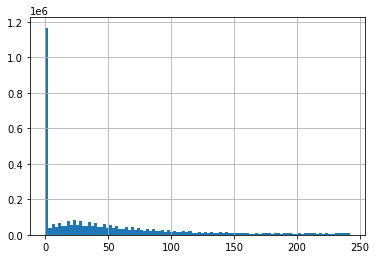

In [89]:
import pandas as pd
train_df['dwelltime_bin'] = pd.qcut(train_df['dwelltime'],1000,duplicates='drop',labels=False)
train_df.dwelltime_bin.hist(bins=100)

<AxesSubplot:>

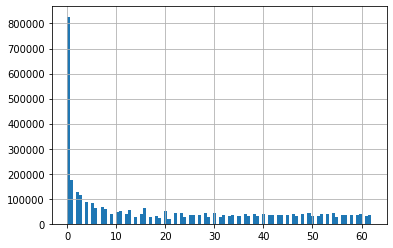

In [85]:
import pandas as pd
train_df['item_rank_bin'] = pd.qcut(train_df['item_rank'],100,duplicates='drop',labels=False)
train_df.item_rank_bin.hist(bins=100)

<AxesSubplot:>

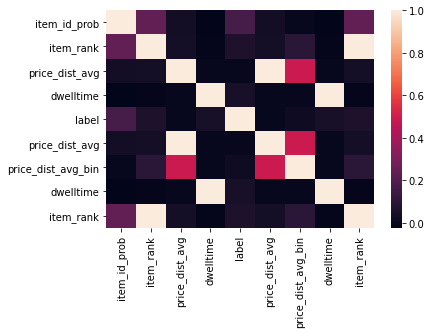

In [28]:
import seaborn as sb

c = train_df[['item_id_prob','item_rank', 'price_dist_avg','dwelltime','label','price_dist_avg','price_dist_avg_bin','dwelltime','item_rank']].corr()

sb.heatmap(c)

In [29]:
c['label']

item_id_prob          0.166982
item_rank             0.053771
price_dist_avg       -0.003598
dwelltime             0.041042
label                 1.000000
price_dist_avg       -0.003598
price_dist_avg_bin    0.014460
dwelltime             0.041042
item_rank             0.053771
Name: label, dtype: float64

In [125]:
X = train_df.drop(['label','session_id','timestamp','item_id', 'dwelltime_bin', 'item_rank_bin'],axis=1)
X

category  dwelltime  weekday  day  hour  month  week  item_id_prob  \
0               0          0        0    7     1      4    15          0.20   
1               0        131        0    7     1      4    15          0.20   
2               0         20        0    7     1      4    15          0.20   
3               0        128        0    7     1      4    15          0.20   
4               0         93        0    7     1      4    15          0.20   
...           ...        ...      ...  ...   ...    ...   ...           ...   
3996415       235          0        4   26     1      9    39          0.24   
3996417       239          0        4   26     2      9    39          0.12   
3996418       239         11        4   26     2      9    39          0.12   
3996420       229          0        6   28     2      9    39          0.04   
3996421       239          0        0   29     2      9    40          0.00   

         item_rank  price_dist_avg  price_dist_avg_bin  
0             54.0             0.0                   3  
1             54.0             0.0                   3  
2             54.0             0.0                   3  
3             54.0             0.0                   3  
4             54.0             0.0                   3  
...            ...             ...                 ...  
3996415      246.0           523.0                   5  
3996417      217.0             0.0                   3  
3996418      217.0             0.0                   3  
3996420       86.0             0.0                   3  
3996421      146.0             0.0                   3  

[3580872 rows x 11 columns]

In [113]:
y = train_df['label']

In [123]:
X.columns

Index(['item_id', 'category', 'dwelltime', 'weekday', 'day', 'hour', 'month',
       'week', 'item_id_prob', 'item_rank', 'price_dist_avg',
       'price_dist_avg_bin', 'dwelltime_bin', 'item_rank_bin'],
      dtype='object')

In [ ]:
X = X['']

In [122]:
import tensorflow as tf
from tensorflow.keras.metrics import AUC
from tensorflow import keras
from tensorflow.keras import layers
# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        layers.Dense(20, activation="relu", name="layer1"),
        layers.Dense(10, activation="relu", name="layer2"),
        layers.Dense(30, name="layer3"),
        layers.Dense(1,'sigmoid')
    ]
)
opt = keras.optimizers.Adam(learning_rate=1e-3)
model.compile(opt, 'binary_crossentropy')



model.fit(X,y,validation_split=0.1,epochs=10)

Epoch 1/10
 63219/100712 [=================>............] - ETA: 22s - loss: 0.7455

KeyboardInterrupt: 

In [116]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3580872 entries, 0 to 3996421
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   session_id          int64  
 1   timestamp           object 
 2   item_id             int64  
 3   category            int64  
 4   dwelltime           int64  
 5   weekday             int64  
 6   day                 int64  
 7   hour                int64  
 8   month               int64  
 9   week                int64  
 10  item_id_prob        float64
 11  item_rank           float64
 12  price_dist_avg      float64
 13  label               bool   
 14  price_dist_avg_bin  int64  
 15  dwelltime_bin       int64  
 16  item_rank_bin       int64  
dtypes: bool(1), float64(3), int64(12), object(1)
memory usage: 596.9+ MB


In [8]:
import pandas as pd

train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])
train_df.head()

session_id                        timestamp  item_id category
0         21 2014-04-07 09:01:28.552000+00:00    11495        0
1         21 2014-04-07 09:03:39.903000+00:00    11495        0
2         21 2014-04-07 09:04:00.598000+00:00    11495        0
3         21 2014-04-07 09:06:09.115000+00:00    11495        0
4         21 2014-04-07 09:07:42.212000+00:00    11495        0

## dwelltime

<AxesSubplot:>

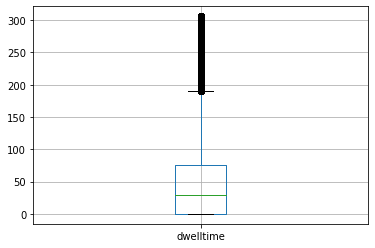

In [92]:


train_df[['dwelltime']].boxplot()



array([[<AxesSubplot:title={'center':'dwelltime'}>]], dtype=object)

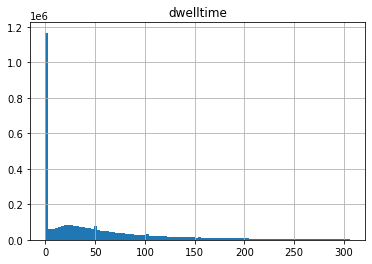

In [99]:
train_df[['dwelltime']].hist(bins=100)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

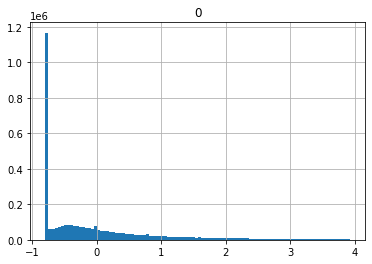

In [96]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


pd.DataFrame(StandardScaler().fit_transform(train_df[['dwelltime']])).hist(bins=100)



array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

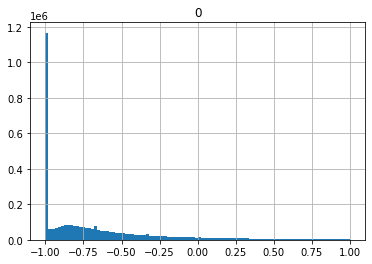

In [98]:

pd.DataFrame(MinMaxScaler((-1,1)).fit_transform(train_df[['dwelltime']])).hist(bins=100)


dwelltime    306.0
Name: 0.95, dtype: float64
dwelltime    217.5
dtype: float64
(3901019, 1)


array([[<AxesSubplot:title={'center':'dwelltime'}>]], dtype=object)

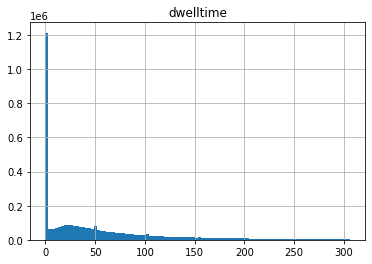

In [34]:
filtered = train_df[train_df['dwelltime'] <= 800][['dwelltime']]
print(filtered.quantile(0.95))

IQR = filtered.quantile(0.75) - filtered.quantile(0.25)
print(filtered.quantile(0.75) + IQR*1.5)
filtered = filtered[filtered <= filtered.quantile(0.95)]
print(filtered.shape)
filtered.hist(bins=100)

In [69]:
train_df = train_df[train_df.dwelltime <= 306]
train_df

session_id                         timestamp  item_id  category  \
0                21  2014-04-07 09:01:28.552000+00:00    11495         0   
1                21  2014-04-07 09:03:39.903000+00:00    11495         0   
2                21  2014-04-07 09:04:00.598000+00:00    11495         0   
3                21  2014-04-07 09:06:09.115000+00:00    11495         0   
4                21  2014-04-07 09:07:42.212000+00:00    11495         0   
...             ...                               ...      ...       ...   
3996415    11299801  2014-09-26 08:59:10.922000+00:00   -11843       235   
3996417    11299787  2014-09-26 13:37:54.867000+00:00    27789       239   
3996418    11299787  2014-09-26 13:38:06.509000+00:00    27789       239   
3996420    11299779  2014-09-28 17:14:44.406000+00:00    22224       229   
3996421    11299814  2014-09-29 16:54:36.153000+00:00     1962       239   

         dwelltime  weekday  day  hour  month  week  item_id_prob  item_rank  \
0                0        0    7     1      4    15          0.20       54.0   
1              131        0    7     1      4    15          0.20       54.0   
2               20        0    7     1      4    15          0.20       54.0   
3              128        0    7     1      4    15          0.20       54.0   
4               93        0    7     1      4    15          0.20       54.0   
...            ...      ...  ...   ...    ...   ...           ...        ...   
3996415          0        4   26     1      9    39          0.24      246.0   
3996417          0        4   26     2      9    39          0.12      217.0   
3996418         11        4   26     2      9    39          0.12      217.0   
3996420          0        6   28     2      9    39          0.04       86.0   
3996421          0        0   29     2      9    40          0.00      146.0   

         price_dist_avg  label  price_dist_avg_bin  
0                   0.0   True                   3  
1                   0.0   True                   3  
2                   0.0   True                   3  
3                   0.0   True                   3  
4                   0.0   True                   3  
...                 ...    ...                 ...  
3996415           523.0  False                   5  
3996417             0.0  False                   3  
3996418             0.0  False                   3  
3996420             0.0  False                   3  
3996421             0.0  False                   3  

[3706906 rows x 15 columns]

item_id_prob          0.144530
item_rank             0.063101
price_dist_avg        0.006935
dwelltime             0.086152
label                 1.000000
price_dist_avg_bin    0.027219
Name: label, dtype: float64


<AxesSubplot:>

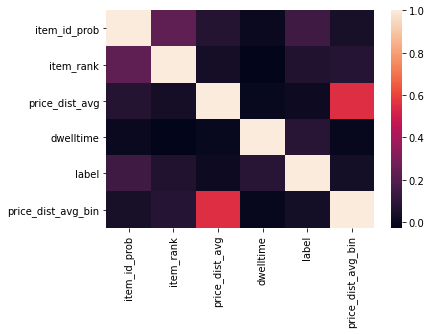

In [72]:

c = train_df[['item_id_prob','item_rank', 'price_dist_avg','dwelltime','label','price_dist_avg_bin']].corr()
print(c['label'])
sb.heatmap(c)

(442033, 1)


array([[<AxesSubplot:title={'center':'dwelltime'}>]], dtype=object)

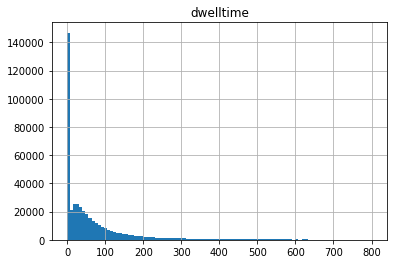

In [26]:
filtered = valid_df[valid_df['dwelltime'] <= 800][['dwelltime']]
print(filtered.shape)
filtered.hist(bins=100)

## item_rank

In [37]:
train_df.columns

Index(['dwelltime'], dtype='object')

<AxesSubplot:>

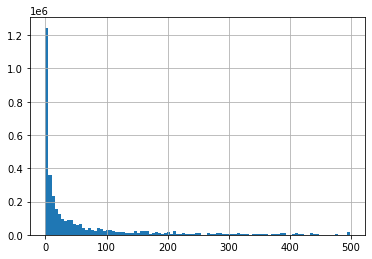

In [93]:
filtered = train_df['item_rank']

filtered.hist(bins=100)

In [82]:
train_df = train_df[train_df.item_rank <= 500]


# preprocess

In [ ]:
3